In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv(r"/content/sample_data/dummy_admission_dataset.csv")
df.head(5)

,Gender,Residence,Religion,FamilyType,FamilyIncome,AdmissionAttempt,SSC_GPA,HSC_GPA,Coaching,DesiredDept,...,DrugUse,AlcoholUse,MentalHealthHistory,PhysicalHealthHistory,FamilyMentalHealth,FamilySuicideAttempt,FamilySuicide,Depression,Anxiety,SuicidalThoughts
0,Female,Rural,Others,Joint,15001-30000,Repeat,Poor,High,Yes,Agriculture,...,No,No,No,No,No,No,No,Yes,No,No
1,Male,Urban,Others,Nuclear,15001-30000,Fresher,High,High,Yes,Varsity,...,No,Yes,No,Yes,No,No,No,No,No,No
2,Male,Urban,Others,Joint,15001-30000,Fresher,High,High,Yes,Agriculture,...,No,No,Yes,No,No,Yes,No,Yes,Yes,Yes
3,Male,Rural,Muslim,Nuclear,>30000,Repeat,High,Poor,No,Medical,...,No,No,No,No,No,No,Yes,Yes,Yes,Yes
4,Female,Rural,Muslim,Nuclear,>30000,Fresher,High,Moderate,Yes,Varsity,...,No,No,No,No,No,No,No,Yes,No,No


Chi 2 only for gender test

In [66]:

from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['Gender'], df['SuicidalThoughts'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(crosstab, "\nChi-square:", chi2, "p-value:", p)


SuicidalThoughts  No  Yes
Gender                   
Female            19   20
Male              36   25 
Chi-square: 0.6458022851465473 p-value: 0.42161748230315654


Chi 2 for all

In [67]:
from scipy.stats import chi2_contingency
import pandas as pd

categorical_cols = df.select_dtypes(include='object').columns
target_col = 'SuicidalThoughts'

results = []

for col in categorical_cols:
    if col != target_col:
        crosstab = pd.crosstab(df[col], df[target_col])
        total_sample = crosstab.sum().sum()

        if crosstab.shape[0] > 1 and crosstab.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(crosstab)

            for index, row in crosstab.iterrows():
                no_count = row.get('No', 0)
                yes_count = row.get('Yes', 0)
                total_count = no_count + yes_count
                total_percent = (total_count / total_sample) * 100 if total_sample > 0 else 0
                no_percent = (no_count / total_sample) * 100 if total_sample > 0 else 0
                yes_percent = (yes_count / total_sample) * 100 if total_sample > 0 else 0


                results.append({
                    'Variable': col,
                    'Category': index,
                    'Total Sample (n)': total_count,
                    'Total Sample (%)': total_percent,
                    'No Suicidal Thoughts (n)': no_count,
                    'No Suicidal Thoughts (%)': no_percent,
                    'Yes Suicidal Thoughts (n)': yes_count,
                    'Yes Suicidal Thoughts (%)': yes_percent,
                    'χ2 value': chi2 if index == crosstab.index[0] else '',
                    'p-value': p if index == crosstab.index[0] else ''
                })
        else:
             for index, row in crosstab.iterrows():
                no_count = row.get('No', 0)
                yes_count = row.get('Yes', 0)
                total_count = no_count + yes_count
                total_percent = (total_count / total_sample) * 100 if total_sample > 0 else 0


                results.append({
                    'Variable': col,
                    'Category': index,
                    'Total Sample (n)': total_count,
                     'Total Sample (%)': total_percent,
                    'No Suicidal Thoughts (n)': no_count,
                    'No Suicidal Thoughts (%)': 'N/A',
                    'Yes Suicidal Thoughts (n)': yes_count,
                    'Yes Suicidal Thoughts (%)': 'N/A',
                    'χ2 value': 'Skipped (Insufficient Categories)',
                    'p-value': 'Skipped (Insufficient Categories)'
                })


results_df = pd.DataFrame(results)
display(results_df)

,Variable,Category,Total Sample (n),Total Sample (%),No Suicidal Thoughts (n),No Suicidal Thoughts (%),Yes Suicidal Thoughts (n),Yes Suicidal Thoughts (%),χ2 value,p-value
0,Gender,Female,39,39.0,19,19.0,20,20.0,0.645802,0.421617
1,Gender,Male,61,61.0,36,36.0,25,25.0,,
2,Residence,Rural,63,63.0,38,38.0,25,25.0,1.407901,0.235405
3,Residence,Urban,37,37.0,17,17.0,20,20.0,,
4,Religion,Muslim,74,74.0,40,40.0,34,34.0,0.0084,0.926975
5,Religion,Others,26,26.0,15,15.0,11,11.0,,
6,FamilyType,Joint,38,38.0,22,22.0,16,16.0,0.061738,0.80377
7,FamilyType,Nuclear,62,62.0,33,33.0,29,29.0,,
8,FamilyIncome,15001-30000,34,34.0,15,15.0,19,19.0,2.620442,0.26976
9,FamilyIncome,<15001,17,17.0,11,11.0,6,6.0,,


In [68]:
results_df.to_csv('chi_square_results.csv', index=False)

from google.colab import files
files.download('chi_square_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X and Y

In [69]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('SuicidalThoughts')

X = pd.get_dummies(df[categorical_cols], dummy_na=False)
y = df['SuicidalThoughts'].apply(lambda x: 1 if x == 'Yes' else 0)


## Unadjusted logistic regression


In [70]:
import statsmodels.api as sm

unadjusted_results = []

for column in X.columns:
    X_unadjusted = X[[column]].astype(int)
    X_unadjusted = sm.add_constant(X_unadjusted, has_constant='add')

    logit_model = sm.Logit(y, X_unadjusted)
    try:
        result = logit_model.fit(disp=0)


        if len(result.params) > 1:
            variable_name = column
            odds_ratio = np.exp(result.params[1])
            conf_int = np.exp(result.conf_int(alpha=0.05).iloc[1])
            p_value = result.pvalues[1]

            unadjusted_results.append({
                'Variable': variable_name,
                'Unadjusted OR': odds_ratio,
                'Unadjusted 95% CI Lower': conf_int[0],
                'Unadjusted 95% CI Upper': conf_int[1],
                'Unadjusted p-value': p_value
            })
    except Exception as e:
        print(f"Could not fit model for {column}: {e}")
        unadjusted_results.append({
            'Variable': column,
            'Unadjusted OR': 'N/A',
            'Unadjusted 95% CI Lower': 'N/A',
            'Unadjusted 95% CI Upper': 'N/A',
            'Unadjusted p-value': 'N/A'
        })


unadjusted_results_df = pd.DataFrame(unadjusted_results)
display(unadjusted_results_df)

/tmp/ipython-input-2293652573.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds_ratio = np.exp(result.params[1])
/tmp/ipython-input-2293652573.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = result.pvalues[1]
/tmp/ipython-input-2293652573.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds_ratio = np.exp(result.params[1])
/tmp/ipython-input-2293652573.py:18: FutureWarning: Series.__getitem__ treating key

,Variable,Unadjusted OR,Unadjusted 95% CI Lower,Unadjusted 95% CI Upper,Unadjusted p-value
0,Gender_Female,1.515789,0.674928,3.404243,3.136554e-01
1,Gender_Male,0.659722,0.293751,1.481640,3.136554e-01
2,Residence_Rural,0.559211,0.246235,1.269990,1.648781e-01
3,Residence_Urban,1.788235,0.787408,4.061155,1.648781e-01
4,Religion_Muslim,1.159091,0.470117,2.857779,7.484724e-01
5,Religion_Others,0.862745,0.349922,2.127128,7.484724e-01
6,FamilyType_Joint,0.827586,0.366468,1.868917,6.488761e-01
7,FamilyType_Nuclear,1.208333,0.535069,2.728748,6.488761e-01
8,FamilyIncome_15001-30000,1.948718,0.843057,4.504444,1.186133e-01
9,FamilyIncome_<15001,0.615385,0.208127,1.819554,3.800746e-01


## Adjusted logistic regression

In [71]:
import statsmodels.api as sm

X_adjusted = sm.add_constant(X)
logit_model_adjusted = sm.Logit(y, X_adjusted.astype(int))
result_adjusted = logit_model_adjusted.fit(disp=0)

adjusted_results = []

for variable in result_adjusted.params.index:
    if variable != 'const':
        odds_ratio = np.exp(result_adjusted.params[variable])
        conf_int = np.exp(result_adjusted.conf_int().loc[variable])
        p_value = result_adjusted.pvalues[variable]

        adjusted_results.append({
            'Variable': variable,
            'Adjusted OR': odds_ratio,
            'Adjusted 95% CI Lower': conf_int[0],
            'Adjusted 95% CI Upper': conf_int[1],
            'Adjusted p-value': p_value
        })

adjusted_results_df = pd.DataFrame(adjusted_results)
display(adjusted_results_df)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Adjusted OR,Adjusted 95% CI Lower,Adjusted 95% CI Upper,Adjusted p-value
0,Gender_Female,2.756679,NaN,NaN,NaN
1,Gender_Male,0.514654,NaN,NaN,NaN
2,Residence_Rural,2.495951,0.0,inf,1.000000
3,Residence_Urban,0.568415,0.0,inf,1.000000
4,Religion_Muslim,0.702017,0.0,inf,1.000000
5,Religion_Others,2.020943,0.0,inf,1.000000
6,FamilyType_Joint,2.551504,NaN,NaN,NaN
7,FamilyType_Nuclear,0.556039,NaN,NaN,NaN
8,FamilyIncome_15001-30000,0.683199,NaN,NaN,NaN
9,FamilyIncome_<15001,1.763826,NaN,NaN,NaN


Combination of adjusted and unadjusted

In [72]:
combined_results_df = pd.merge(unadjusted_results_df, adjusted_results_df, on='Variable', how='left')
display(combined_results_df)

,Variable,Unadjusted OR,Unadjusted 95% CI Lower,Unadjusted 95% CI Upper,Unadjusted p-value,Adjusted OR,Adjusted 95% CI Lower,Adjusted 95% CI Upper,Adjusted p-value
0,Gender_Female,1.515789,0.674928,3.404243,3.136554e-01,2.756679,NaN,NaN,NaN
1,Gender_Male,0.659722,0.293751,1.481640,3.136554e-01,0.514654,NaN,NaN,NaN
2,Residence_Rural,0.559211,0.246235,1.269990,1.648781e-01,2.495951,0.0,inf,1.000000
3,Residence_Urban,1.788235,0.787408,4.061155,1.648781e-01,0.568415,0.0,inf,1.000000
4,Religion_Muslim,1.159091,0.470117,2.857779,7.484724e-01,0.702017,0.0,inf,1.000000
5,Religion_Others,0.862745,0.349922,2.127128,7.484724e-01,2.020943,0.0,inf,1.000000
6,FamilyType_Joint,0.827586,0.366468,1.868917,6.488761e-01,2.551504,NaN,NaN,NaN
7,FamilyType_Nuclear,1.208333,0.535069,2.728748,6.488761e-01,0.556039,NaN,NaN,NaN
8,FamilyIncome_15001-30000,1.948718,0.843057,4.504444,1.186133e-01,0.683199,NaN,NaN,NaN
9,FamilyIncome_<15001,0.615385,0.208127,1.819554,3.800746e-01,1.763826,NaN,NaN,NaN


In [73]:
combined_results_df.to_csv('logistic_regression_results.csv', index=False)

from google.colab import files
files.download('logistic_regression_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train a compatible model

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

## Calculate shap values


In [75]:
import shap

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

## Visualize shap results

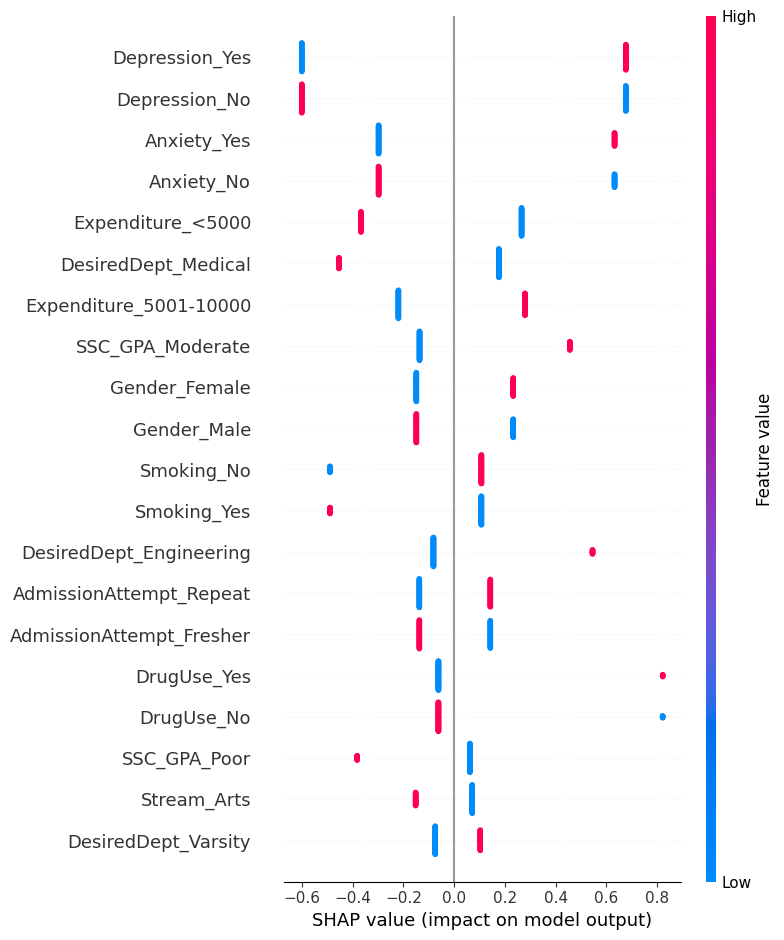

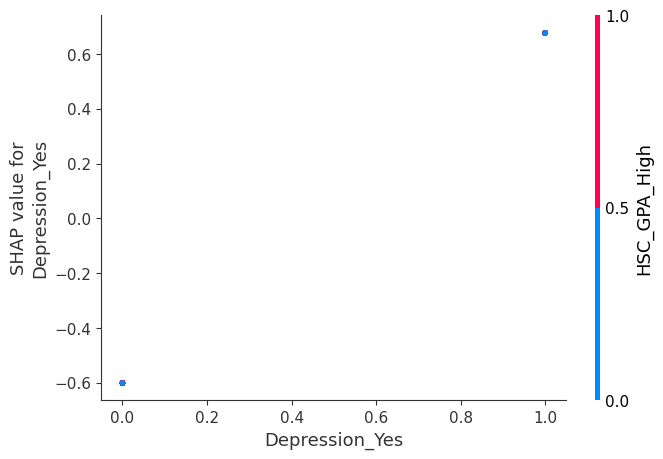

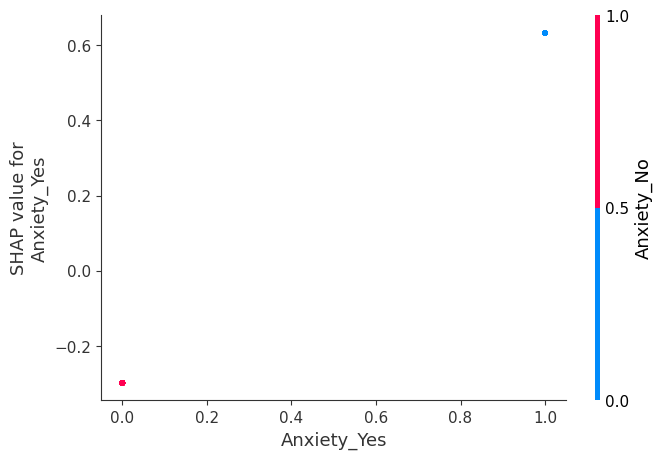

In [76]:
shap.summary_plot(shap_values, X)

shap.dependence_plot('Depression_Yes', shap_values.values, X, feature_names=X.columns)
shap.dependence_plot('Anxiety_Yes', shap_values.values, X, feature_names=X.columns)
# Here I choose two features for dependence plots, for example, 'Depression_Yes' and 'Anxiety_Yes'

REF


In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [78]:
selected_features = X.columns[rfe.support_]
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print("Selected Features:")
print(selected_features)
print("\nFeature Ranking:")
display(feature_ranking)

Selected Features:
Index(['DesiredDept_Medical', 'Expenditure_<5000', 'Smoking_No', 'DrugUse_No',
       'DrugUse_Yes', 'FamilyMentalHealth_No', 'Depression_No',
       'Depression_Yes', 'Anxiety_No', 'Anxiety_Yes'],
      dtype='object')

Feature Ranking:


,Feature,Ranking
26,Expenditure_<5000,1
31,Smoking_No,1
23,DesiredDept_Medical,1
49,Anxiety_No,1
41,FamilyMentalHealth_No,1
47,Depression_No,1
34,DrugUse_Yes,1
33,DrugUse_No,1
50,Anxiety_Yes,1
48,Depression_Yes,1


## optimal number of features



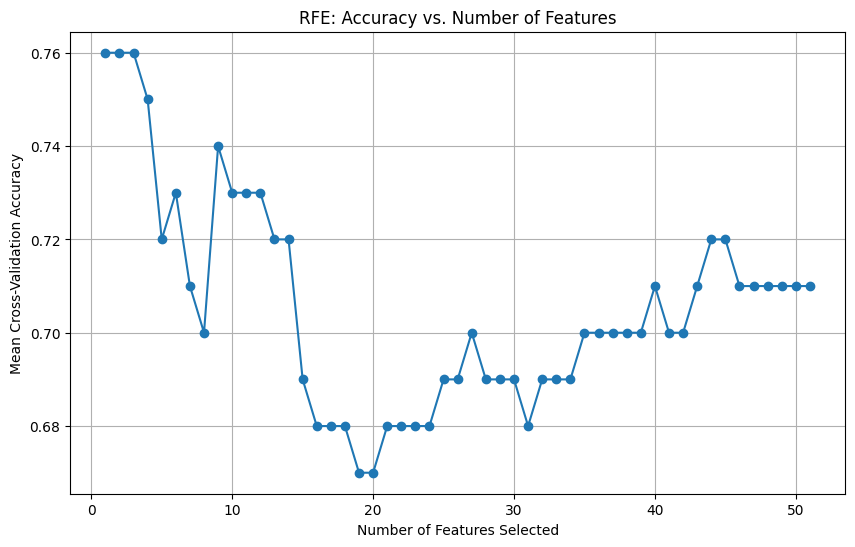

In [79]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

cv_scores = []
n_features_range = range(1, X.shape[1] + 1)

for n_features in n_features_range:
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select=n_features)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfe.fit(X_train, y_train)
        X_train_rfe = rfe.transform(X_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        score = accuracy_score(y_test, y_pred)
        fold_scores.append(score)
    cv_scores.append(np.mean(fold_scores))

plt.figure(figsize=(10, 6))
plt.plot(n_features_range, cv_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("RFE: Accuracy vs. Number of Features")
plt.grid(True)
plt.show()

## Train model on optimal subset


## feature importance


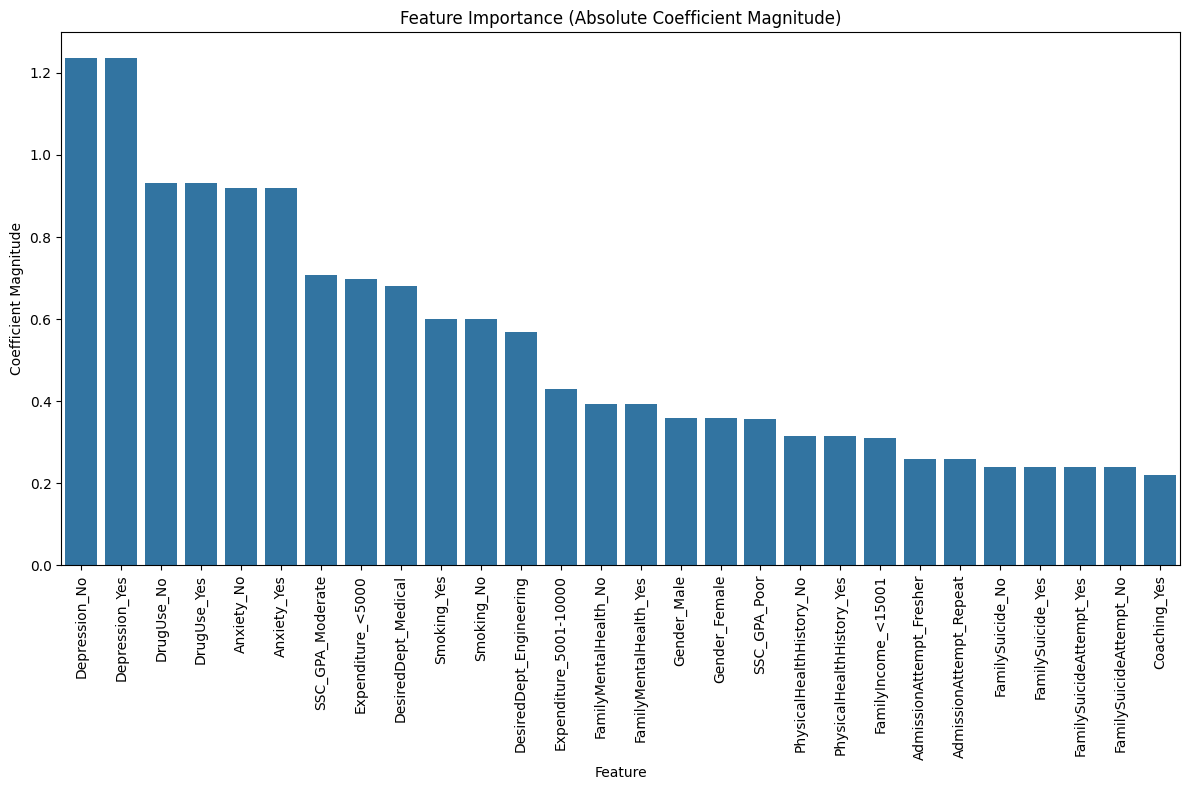

In [81]:
selected_feature_names = rfe_optimal.get_feature_names_out(X.columns)
feature_importance = pd.Series(final_model.coef_[0], index=selected_feature_names)
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_sorted.index, y=feature_importance_sorted.values)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance (Absolute Coefficient Magnitude)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**KNN**

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

In [83]:
model = KNeighborsClassifier(n_neighbors=5)

## learning curve data


In [84]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

In [85]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

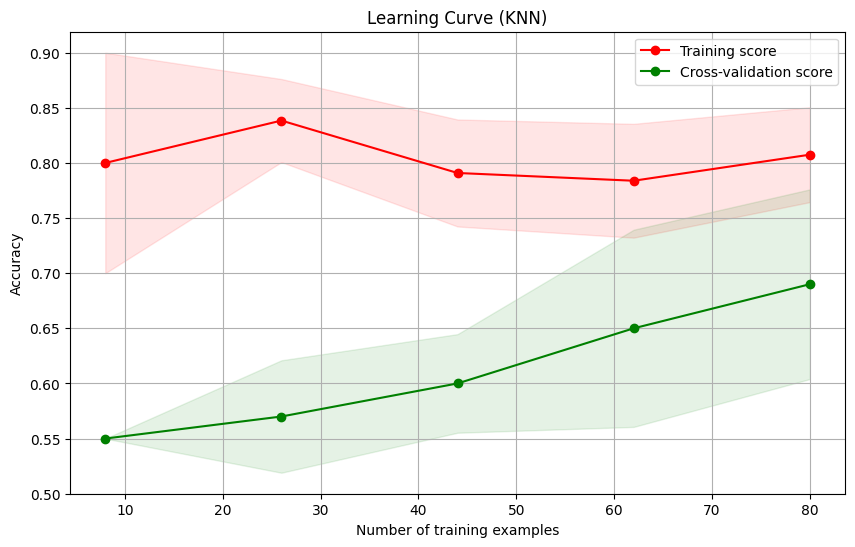

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (KNN)")
plt.legend(loc="best")
plt.grid()
plt.show()

learning curve analysis for DT, **RF**

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold

In [88]:
import numpy as np
import matplotlib.pyplot as plt

XG and Cat

In [89]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)

DT

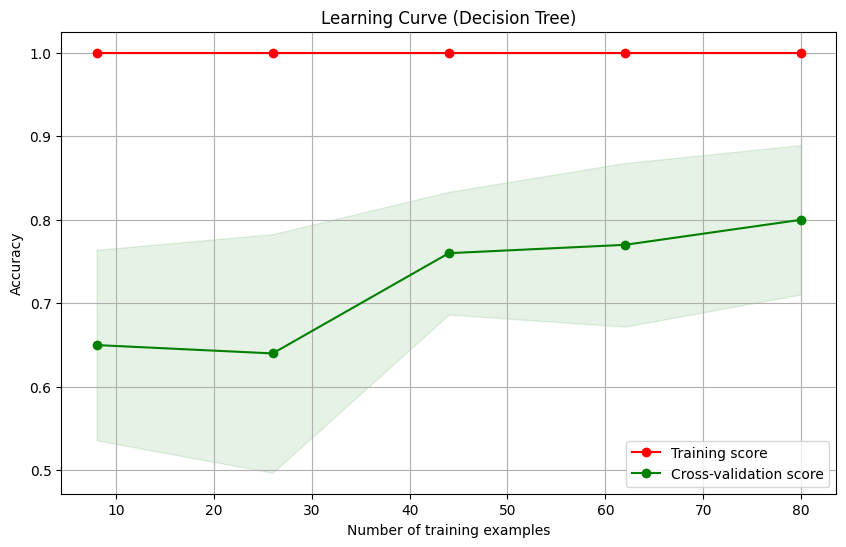

In [90]:
train_sizes, train_scores, test_scores = learning_curve(dt_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Decision Tree)")
plt.legend(loc="best")
plt.grid()
plt.show()

RF

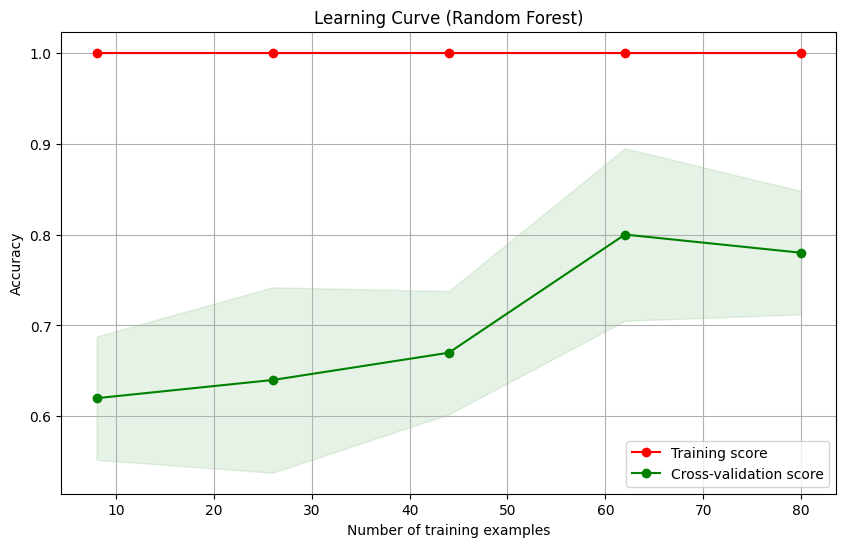

In [91]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend(loc="best")
plt.grid()
plt.show()

XG

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:38:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:38:38] WARNING: /w

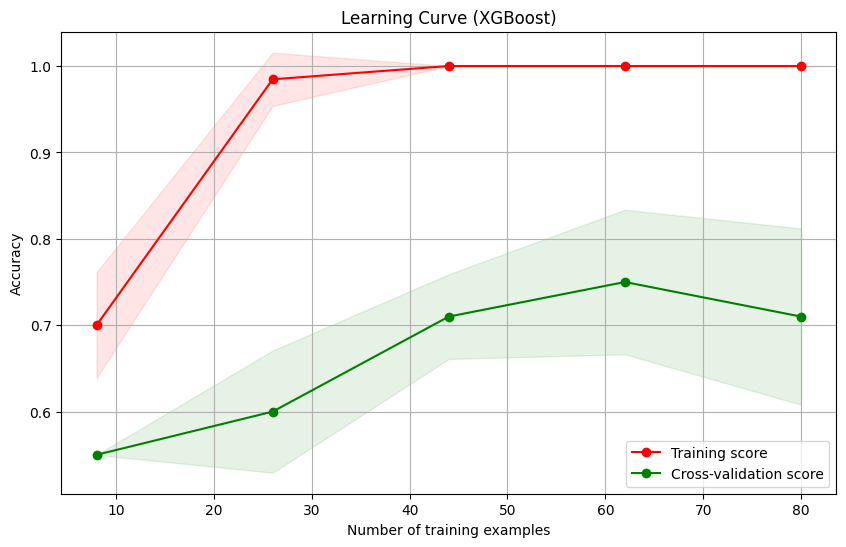

In [92]:
import re

def sanitize_col_names(df):
    """Sanitizes column names by replacing special characters."""
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'\[|\]|<', '_', col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df

X_sanitized = sanitize_col_names(X.copy())


train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_sanitized, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (XGBoost)")
plt.legend(loc="best")
plt.grid()
plt.show()

CAT

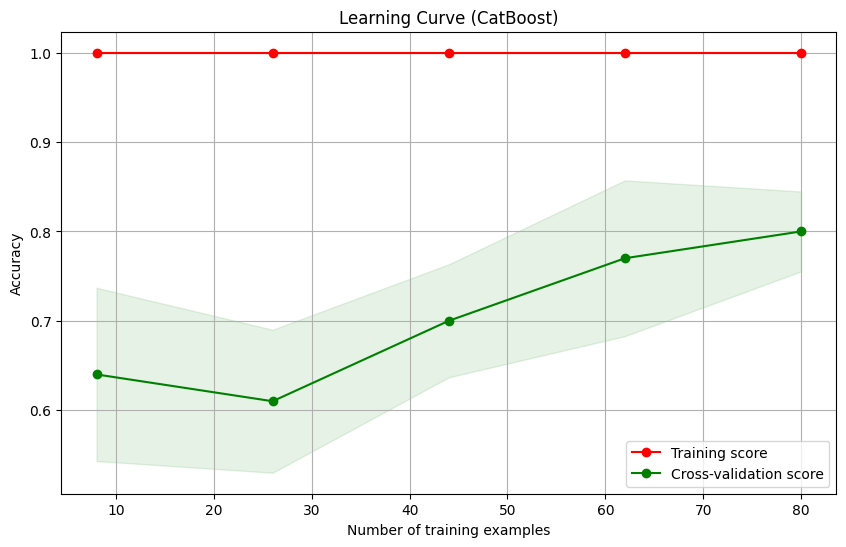

In [93]:
train_sizes, train_scores, test_scores = learning_curve(cat_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (CatBoost)")
plt.legend(loc="best")
plt.grid()
plt.show()

**Accuracy, Precision, F1 Score, Log Loss, AUC, AUC 95% CI)**

In [94]:
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from collections import defaultdict

def sanitize_col_names(df):
    """Sanitizes column names by replacing special characters and ensures uniqueness."""
    cols = df.columns
    new_cols = []
    name_counts = defaultdict(int)
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '_', str(col))
        original_name = new_col
        while new_col in new_cols:
            name_counts[original_name] += 1
            new_col = f"{original_name}_{name_counts[original_name]}"
        new_cols.append(new_col)
    df.columns = new_cols
    return df

X_sanitized = sanitize_col_names(X.copy())

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    accuracy_scores = cross_val_score(model, X_sanitized, y, cv=skf, scoring='accuracy')
    precision_scores = cross_val_score(model, X_sanitized, y, cv=skf, scoring='precision')
    f1_scores = cross_val_score(model, X_sanitized, y, cv=skf, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_sanitized, y, cv=skf, scoring='roc_auc')

    log_loss_scores = -cross_val_score(model, X_sanitized, y, cv=skf, scoring='neg_log_loss')



    auc_mean = np.mean(roc_auc_scores)
    auc_std = np.std(roc_auc_scores)
    auc_ci_lower = auc_mean - 1.96 * (auc_std / np.sqrt(len(roc_auc_scores)))
    auc_ci_upper = auc_mean + 1.96 * (auc_std / np.sqrt(len(roc_auc_scores)))


    results.append({
        'Model': name,
        'ACC': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'F1 score': np.mean(f1_scores),
        'Log loss': np.mean(log_loss_scores),
        'AUC': auc_mean,
        'AUC 95% CI': f"({auc_ci_lower:.2f}, {auc_ci_upper:.2f})"
    })

results_df = pd.DataFrame(results)
display(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:40:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:40:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:40:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:40:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:40:19] WARNING: /w

,Model,ACC,Precision,F1 score,Log loss,AUC,AUC 95% CI
0,Logistic Regression,0.71,0.702143,0.657198,0.647335,0.757576,"(0.69, 0.83)"
1,Decision Tree,0.80,0.771970,0.767162,7.208731,0.797980,"(0.71, 0.88)"
2,Random Forest,0.78,0.782401,0.753146,0.496633,0.848485,"(0.77, 0.93)"
3,XGBoost,0.71,0.679188,0.659927,0.729476,0.755556,"(0.66, 0.85)"
4,CatBoost,0.80,0.780128,0.777465,0.445741,0.896970,"(0.84, 0.96)"


In [95]:
results_df.to_csv('model_evaluation_results.csv', index=False)

from google.colab import files
files.download('model_evaluation_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

confusion metrics

In [96]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Training Logistic Regression...
Finished training Logistic Regression.

Training Decision Tree...
Finished training Decision Tree.

Training Random Forest...
Finished training Random Forest.

Training CatBoost...
Finished training CatBoost.



,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.70,0.714286,0.555556,0.625000,0.787879
1,Decision Tree,0.75,0.700000,0.777778,0.736842,0.752525
2,Random Forest,0.80,0.692308,1.000000,0.818182,0.919192
3,CatBoost,0.80,0.692308,1.000000,0.818182,0.979798


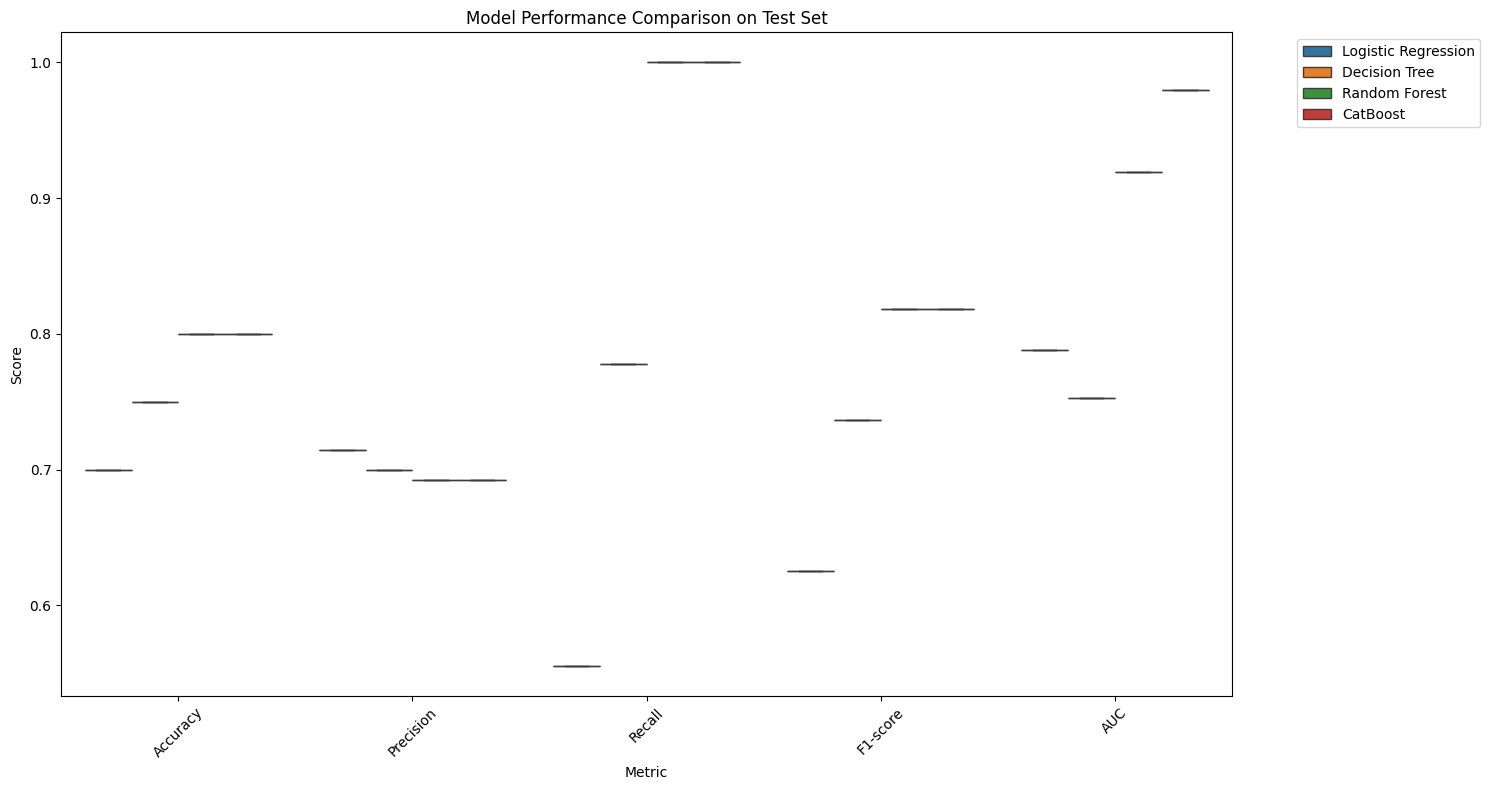

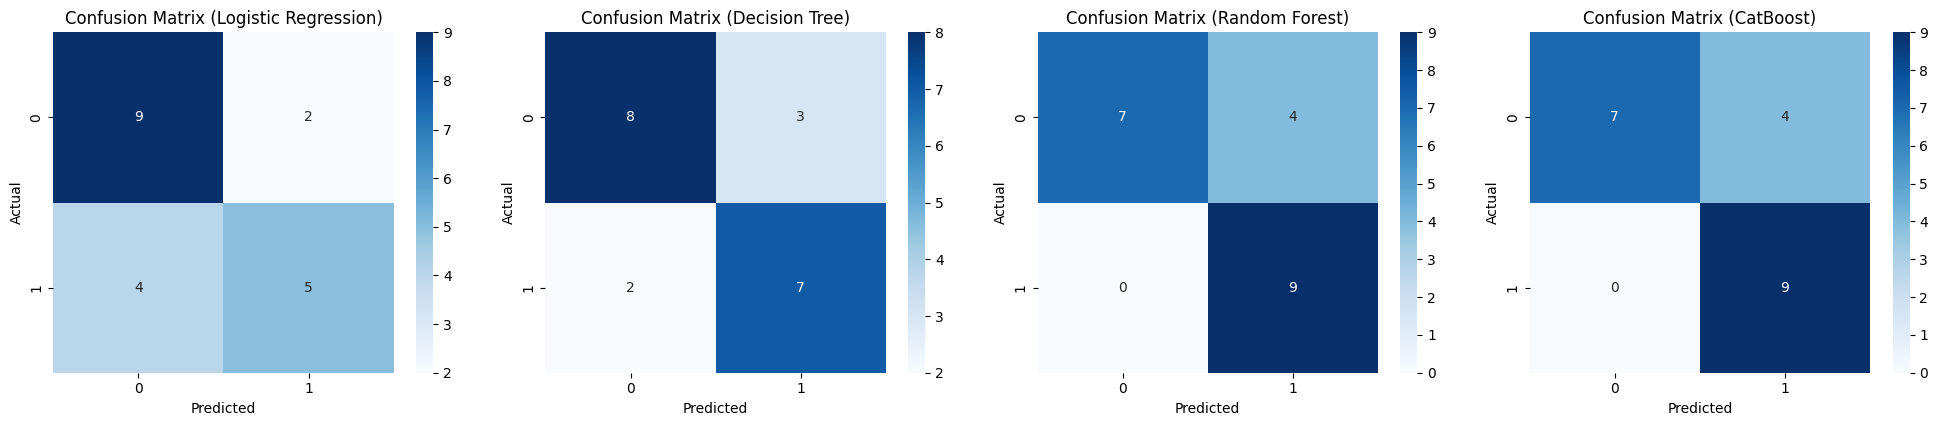

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_results = []


trained_models = {}

models_for_this_cell = {name: model for name, model in models.items() if name != "XGBoost"}

for name, model in models_for_this_cell.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"Finished training {name}.\n")

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    test_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    })

test_results_df = pd.DataFrame(test_results)
display(test_results_df)

test_results_melted = test_results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


plt.figure(figsize=(15, 8))
sns.boxplot(x='Metric', y='Score', hue='Model', data=test_results_melted)
plt.title('Model Performance Comparison on Test Set')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, len(trained_models), figsize=(5 * len(trained_models), 4))
axes = axes.flatten()

for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix ({name})')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()

Logistic Regression, Decision Tree, Random Forest, XGBoost, CatBoost model performance

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

test_results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    test_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    })

test_results_df = pd.DataFrame(test_results)
display(test_results_df)

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.70,0.714286,0.555556,0.625000,0.787879
1,Decision Tree,0.75,0.700000,0.777778,0.736842,0.752525
2,Random Forest,0.80,0.692308,1.000000,0.818182,0.919192
3,CatBoost,0.80,0.692308,1.000000,0.818182,0.979798


train test



In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sanitized, y, test_size=0.2, random_state=42, stratify=y)

**ROC**

In [104]:
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"Finished training {name}.\n")

Training Logistic Regression...
Finished training Logistic Regression.

Training Decision Tree...
Finished training Decision Tree.

Training Random Forest...
Finished training Random Forest.

Training XGBoost...
Finished training XGBoost.

Training CatBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:45:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Finished training CatBoost.



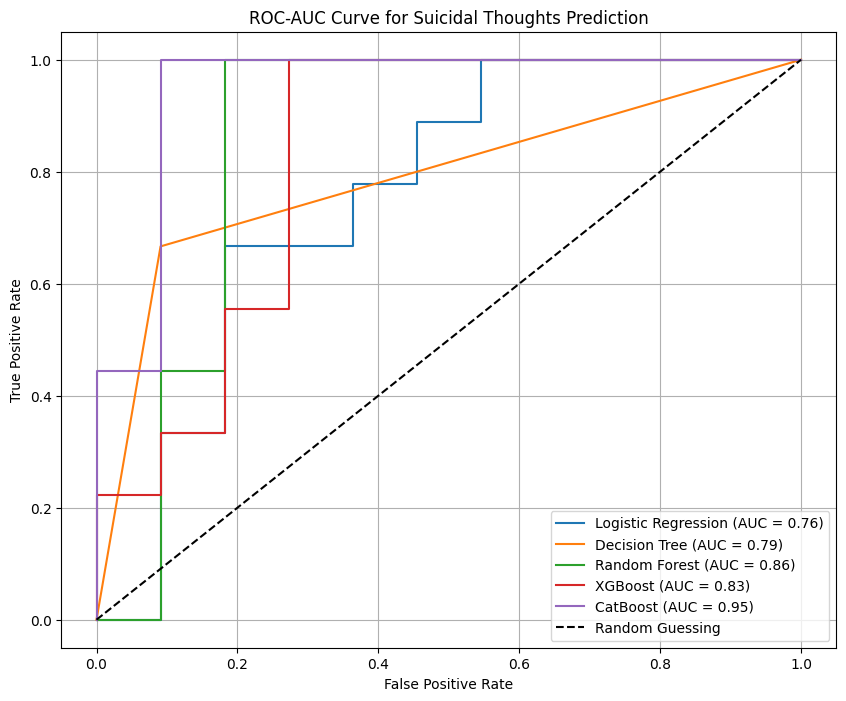

In [105]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Model {name} does not have predict_proba and will be skipped for ROC curve.")


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Suicidal Thoughts Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()